In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../datasets/properties.csv')
df.head()

,Unnamed: 0,A,sig_nu / MHz,nu_0 / MHz,d / (ms/MHz),Fluence / Jy ms,sig_t / ms,log_10 Scaled Energy
0,0,0.637494,131.520805,1430.229581,-0.004753,0.141160,0.656069,38.351973
1,1,0.561516,106.607351,1700.455030,-0.005331,0.070882,0.630929,38.112288
2,2,0.154437,162.373375,1576.590370,-0.004407,0.043163,0.522891,37.894769
3,3,0.173479,82.183029,1687.044344,0.012490,0.046451,1.264357,37.912614
4,4,0.625870,146.305856,1741.400239,-0.000721,0.457835,0.635353,36.449133


In [3]:
df = df.drop(columns=["Unnamed: 0"], axis=1)
df.head()

,A,sig_nu / MHz,nu_0 / MHz,d / (ms/MHz),Fluence / Jy ms,sig_t / ms,log_10 Scaled Energy
0,0.637494,131.520805,1430.229581,-0.004753,0.141160,0.656069,38.351973
1,0.561516,106.607351,1700.455030,-0.005331,0.070882,0.630929,38.112288
2,0.154437,162.373375,1576.590370,-0.004407,0.043163,0.522891,37.894769
3,0.173479,82.183029,1687.044344,0.012490,0.046451,1.264357,37.912614
4,0.625870,146.305856,1741.400239,-0.000721,0.457835,0.635353,36.449133


In [4]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan

c:\Users\Sudha\OneDrive\Documents\GitHub\Projects\Origin FRB20121102A\Project_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
n_neighbors = 6
umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.01, n_components=2)
embedding = umap_model.fit_transform(df)

In [6]:
log_10_A = np.log10(df['A'])
log_10_A[np.isneginf(log_10_A)] = 0

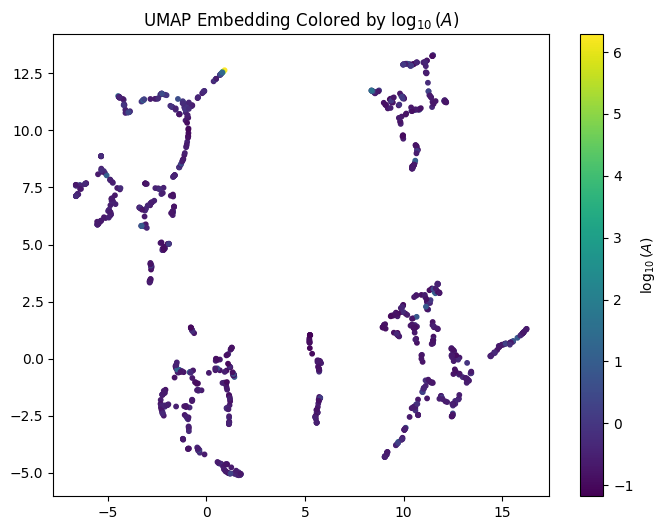

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=log_10_A, cmap='viridis', s=10)
plt.colorbar(scatter, label='$\log_{10}(A)$')  # Color bar for the parameter
plt.title("UMAP Embedding Colored by $\log_{10}(A)$")
plt.show()

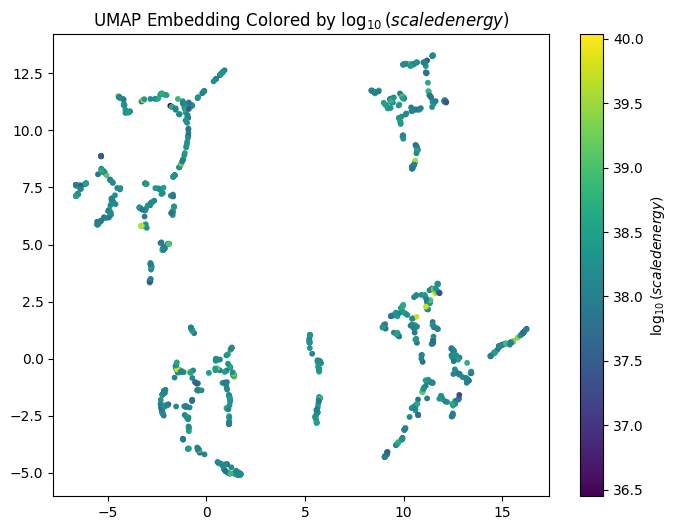

In [8]:
log_10_scaled_energy = df['log_10 Scaled Energy']
log_10_scaled_energy[np.isneginf(log_10_scaled_energy)] = 0
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=log_10_scaled_energy, cmap='viridis', s=10)
plt.colorbar(scatter, label='$\log_{10}(scaled energy)$')
plt.title("UMAP Embedding Colored by $\log_{10}(scaled energy)$")
plt.show()

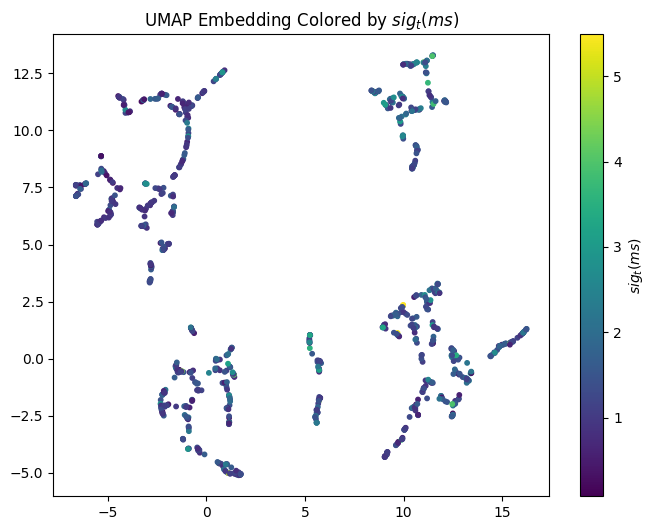

In [9]:
sig_t = df['sig_t / ms']
sig_t[np.isneginf(sig_t)] = 0
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=sig_t, cmap='viridis', s=10)
plt.colorbar(scatter, label='$sig_t (ms)$')
plt.title("UMAP Embedding Colored by $sig_t (ms)$")
plt.show()

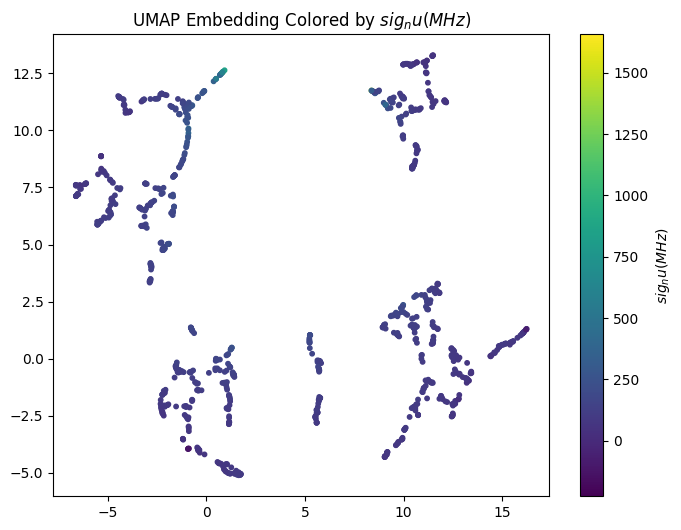

In [10]:
sig_nu = df['sig_nu / MHz']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=sig_nu, cmap='viridis', s=10)
plt.colorbar(scatter, label='$sig_nu (MHz)$')  # Color bar for the parameter
plt.title("UMAP Embedding Colored by $sig_nu (MHz)$")
plt.show()

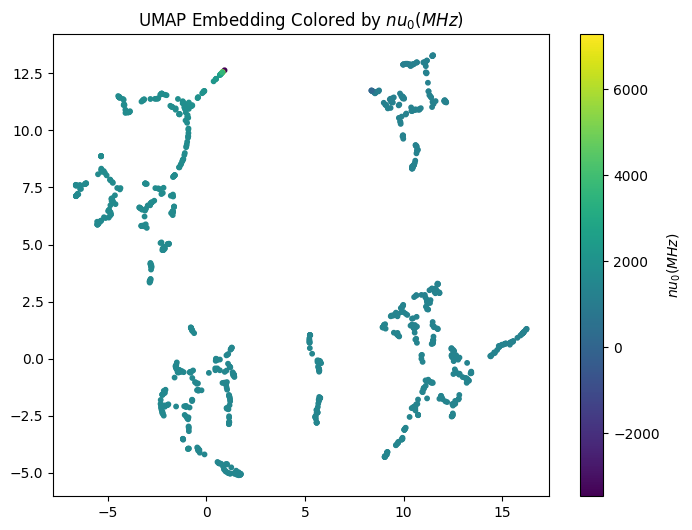

In [11]:
nu_0 = df['nu_0 / MHz']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=nu_0, cmap='viridis', s=10)
plt.colorbar(scatter, label='$nu_0 (MHz)$')  # Color bar for the parameter
plt.title("UMAP Embedding Colored by $nu_0 (MHz)$")
plt.show()

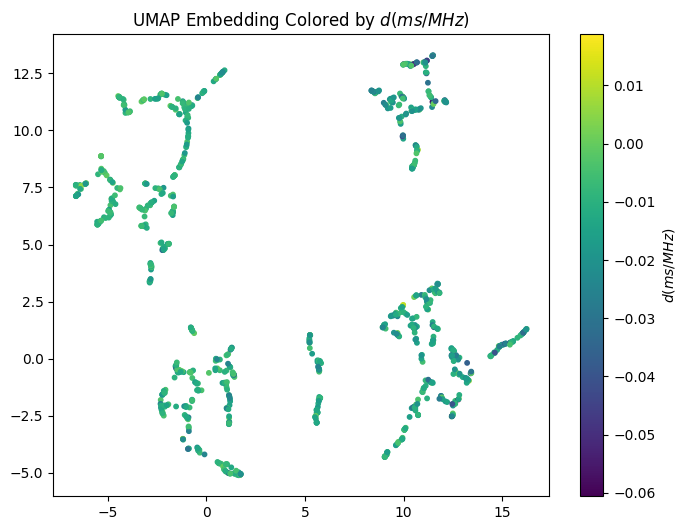

In [12]:
d = df['d / (ms/MHz)']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=d, cmap='viridis', s=10)
plt.colorbar(scatter, label='$d (ms/MHz)$')  # Color bar for the parameter
plt.title("UMAP Embedding Colored by $d (ms/MHz)$")
plt.show()

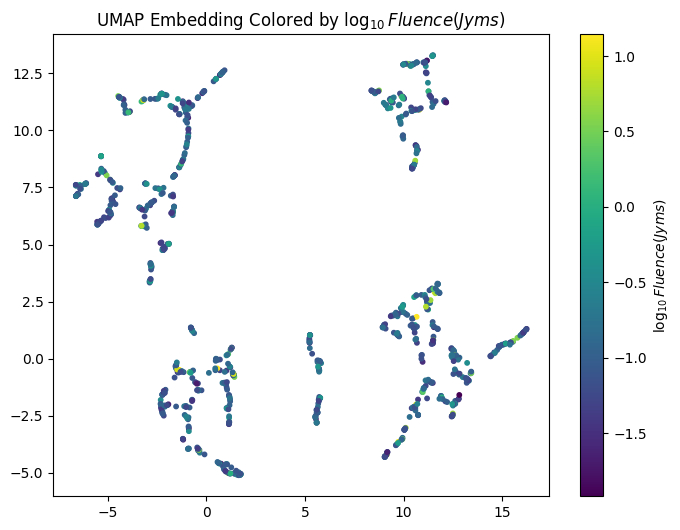

In [13]:
log_10_Fluence = np.log10(df['Fluence / Jy ms'])
log_10_Fluence[np.isneginf(log_10_Fluence)] = 0
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=log_10_Fluence, cmap='viridis', s=10)
plt.colorbar(scatter, label='$\log_{10}Fluence(Jy ms)$')  # Color bar for the parameter
plt.title("UMAP Embedding Colored by $\log_{10}Fluence(Jy ms)$")
plt.show()

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=80, min_samples=15)
cluster_labels = clusterer.fit_predict(embedding)

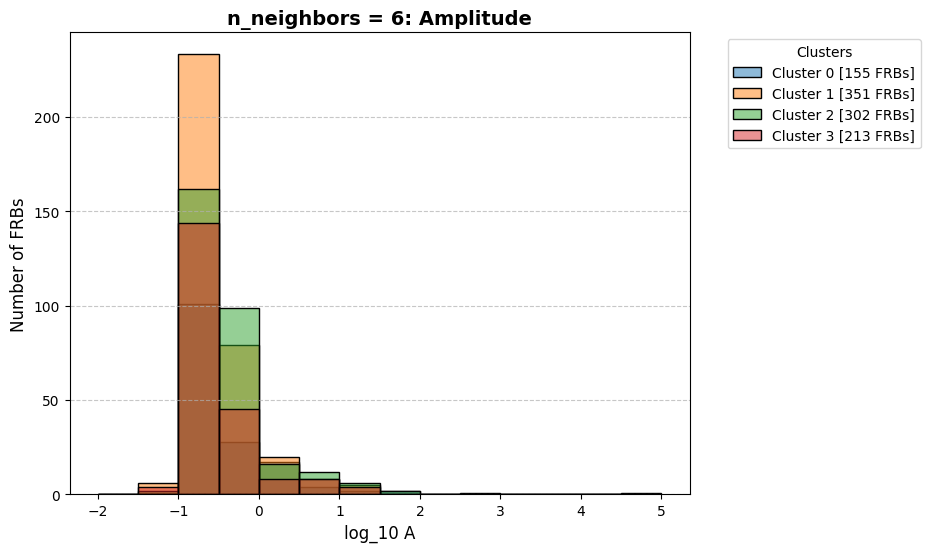

In [15]:
parameter_name = 'log_10 A'  # Name of the parameter
parameter_column_index = 0 

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(-2, 5, 15)

for label in unique_clusters:
    cluster_data = log_10_A[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data, bins=bins, kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: Amplitude", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

c:\Users\Sudha\OneDrive\Documents\GitHub\Projects\Origin FRB20121102A\Project_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


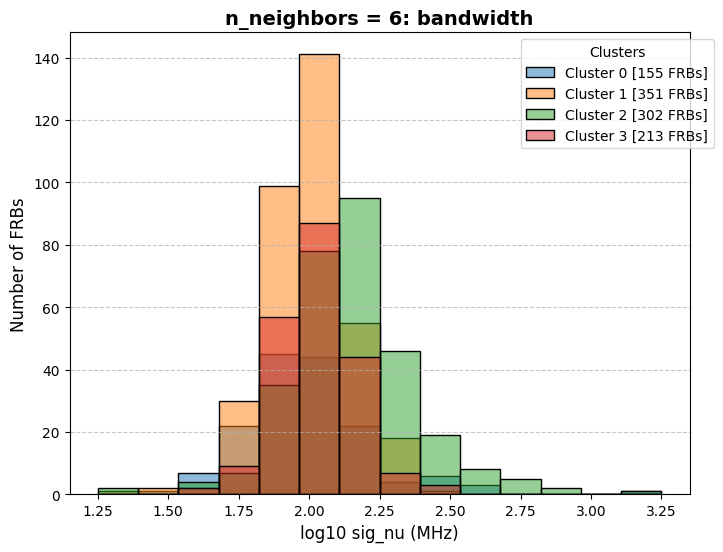

In [16]:
parameter_name = 'log10 sig_nu (MHz)'  # Name of the parameter
log_10_sig_nu = np.log10(df['sig_nu / MHz'])

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(1.25, 3.25, 15)
for label in unique_clusters:
    cluster_data = log_10_sig_nu[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data,bins=bins ,kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: bandwidth", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

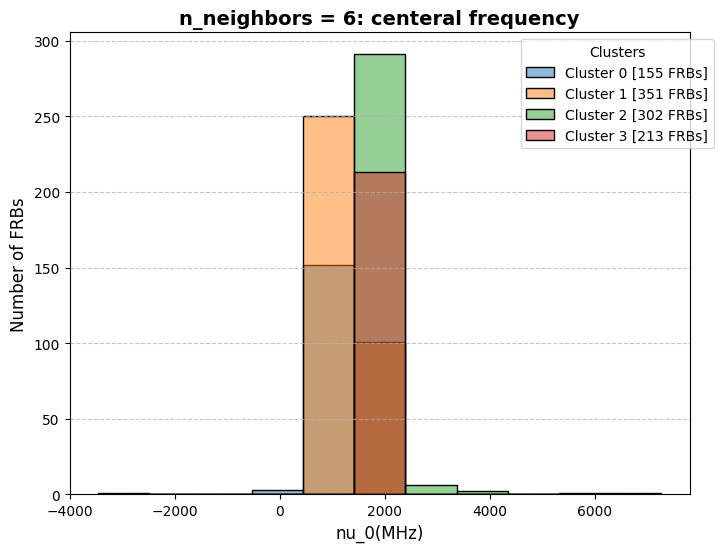

In [17]:
parameter_name = 'nu_0(MHz)'  # Name of the parameter

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(nu_0.min() - 1, nu_0.max() + 1, 12)
for label in unique_clusters:
    cluster_data = nu_0[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data, bins=bins, kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: centeral frequency", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

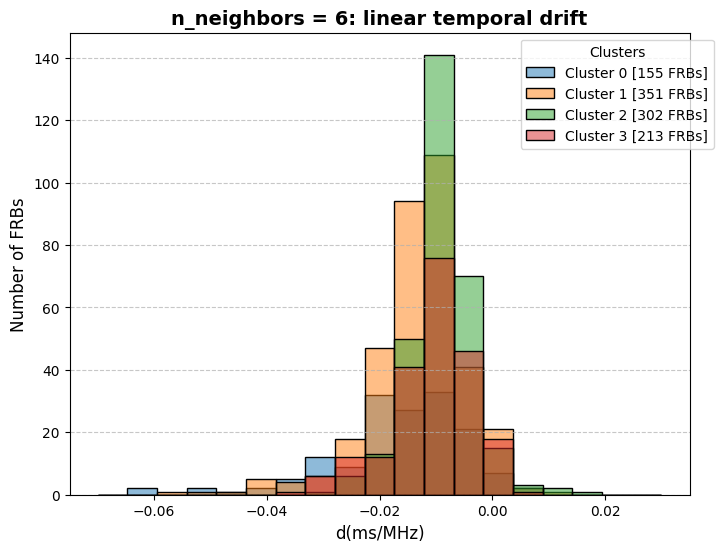

In [18]:
parameter_name = 'd(ms/MHz)'  # Name of the parameter

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(-0.07, 0.03, 20)
for label in unique_clusters:
    cluster_data = d[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data, bins=bins, kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: linear temporal drift", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

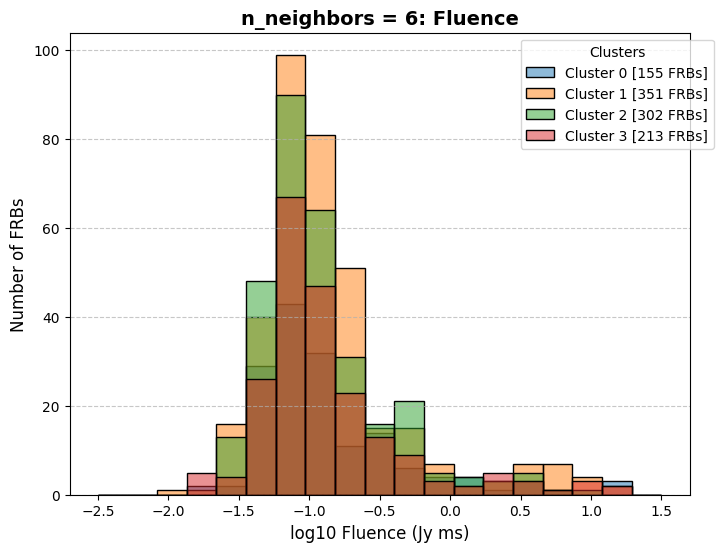

In [19]:
parameter_name = 'log10 Fluence (Jy ms)'  # Name of the parameter

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(-2.5, 1.5, 20)
for label in unique_clusters:
    cluster_data = log_10_Fluence[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data,bins=bins, kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: Fluence", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

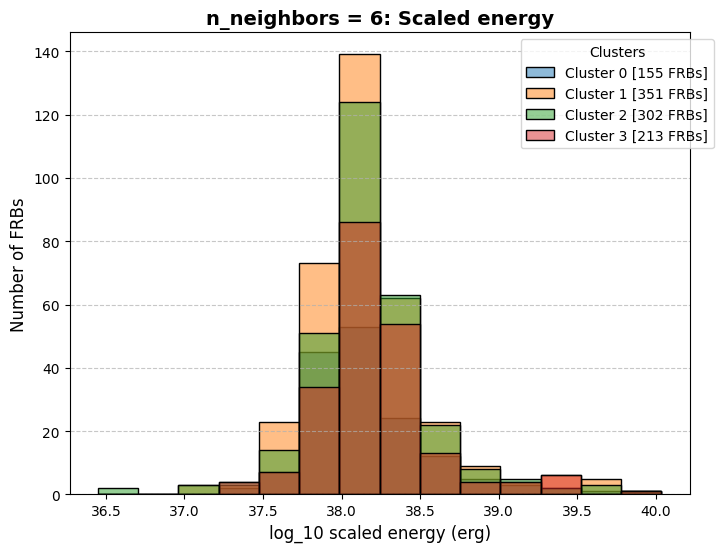

In [20]:
parameter_name = 'log_10 scaled energy (erg)'  # Name of the parameter
parameter_column_index = 0 

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(log_10_scaled_energy.min(), log_10_scaled_energy.max(), 15)

for label in unique_clusters:
    cluster_data = log_10_scaled_energy[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data, bins= bins ,kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: Scaled energy", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

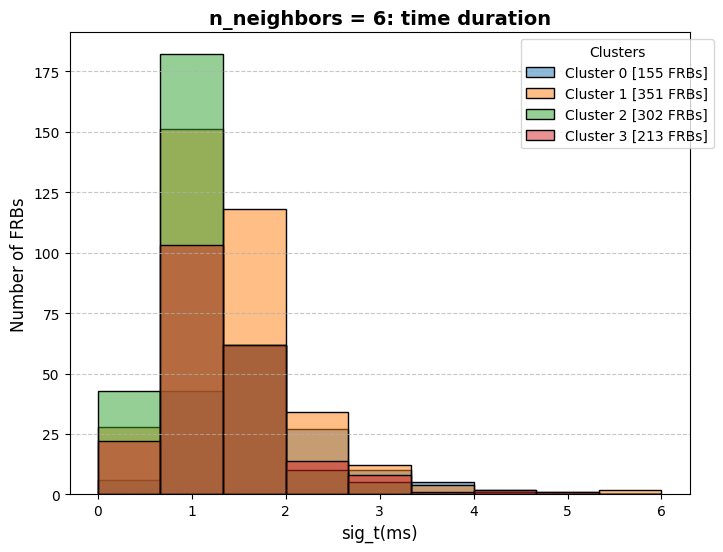

In [21]:
parameter_name = 'sig_t(ms)'  # Name of the parameter

unique_clusters = np.unique(cluster_labels)
cluster_counts = {label: sum(cluster_labels == label) for label in unique_clusters}

plt.figure(figsize=(8, 6))
bins = np.linspace(0, 6, 10)
for label in unique_clusters:
    cluster_data = sig_t[cluster_labels == label]  # Data for current cluster
    sns.histplot(
        cluster_data,bins=bins, kde=False, label=f"Cluster {label} [{cluster_counts[label]} FRBs]", 
        alpha=0.5, edgecolor="black"
    )

plt.title("n_neighbors = 6: time duration", fontsize=14, fontweight="bold")
plt.xlabel(parameter_name, fontsize=12)
plt.ylabel("Number of FRBs", fontsize=12)
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
df['Cluster'] = cluster_labels

In [40]:
result = {}

In [41]:
Amplitude = df.groupby("Cluster")["A"]
mean = Amplitude.mean()
sem = Amplitude.std() / np.sqrt(Amplitude.count())
result['Amplitude'] = (mean.round(2).astype(str) + "±" + sem.round(2).astype(str))

In [42]:
df['log_10 sig_nu'] = np.log10(df['sig_nu / MHz'])
bandwidth = df.groupby("Cluster")["log_10 sig_nu"]
mean = bandwidth.mean()
sem = bandwidth.std() / np.sqrt(bandwidth.count())
result['Bandwidth (MHz)'] = (mean.round(2).astype(str) + "±" + sem.round(2).astype(str))

c:\Users\Sudha\OneDrive\Documents\GitHub\Projects\Origin FRB20121102A\Project_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
central_frequency = df.groupby("Cluster")["nu_0 / MHz"]
mean = central_frequency.mean()
sem = central_frequency.std() / np.sqrt(central_frequency.count())
result['Central Frequency (MHz)'] = (mean.round(2).astype(str) + "±" + sem.round(2).astype(str))

In [44]:
linear_temporal_drift = df.groupby("Cluster")["d / (ms/MHz)"]
mean = linear_temporal_drift.mean()
sem = linear_temporal_drift.std() / np.sqrt(linear_temporal_drift.count())
result['Linear Temporal Drift (ms MHz–1)'] = (mean.round(4).astype(str) + "±" + sem.round(4).astype(str))

In [45]:
time_duration = df.groupby("Cluster")["sig_t / ms"]
mean = time_duration.mean()
sem = time_duration.std() / np.sqrt(time_duration.count())
result['Time Duration (ms) '] = (mean.round(2).astype(str) + "±" + sem.round(2).astype(str))

In [46]:
Fluence = df.groupby("Cluster")["Fluence / Jy ms"]
mean = Fluence.mean()
sem = Fluence.std() / np.sqrt(Fluence.count())
result['Fluence (Jy ms)'] = (mean.round(2).astype(str) + "±" + sem.round(2).astype(str))

In [47]:
Scaled_Energy = df.groupby("Cluster")["log_10 Scaled Energy"]
mean = Scaled_Energy.mean()
sem = Scaled_Energy.std() / np.sqrt(Scaled_Energy.count())
result['Scaled Energy (log10 erg)'] = (mean.round(2).astype(str) + "±" + sem.round(2).astype(str))

In [48]:
df_avg_value = pd.DataFrame(result)
df_avg_value.index = df['Cluster'].unique()
print(df_avg_value)

        Amplitude Bandwidth (MHz) Central Frequency (MHz)  \
1       1.43±0.52       1.99±0.02            1183.15±15.3   
2       0.76±0.13        2.0±0.01            1375.95±2.57   
0  6725.3±6398.44       2.15±0.01            1726.91±31.6   
3       0.77±0.15       2.03±0.01            1511.82±2.57   

  Linear Temporal Drift (ms MHz–1) Time Duration (ms)  Fluence (Jy ms)  \
1                    -0.0164±0.001           1.72±0.06       0.55±0.16   
2                   -0.0133±0.0005           1.45±0.04        0.54±0.1   
0                   -0.0091±0.0003           1.12±0.03       0.29±0.05   
3                   -0.0104±0.0005           1.33±0.05       0.54±0.13   

  Scaled Energy (log10 erg)  
1                38.17±0.03  
2                38.18±0.02  
0                38.17±0.02  
3                38.21±0.03  
